# Handwritten digits recognition (using Convolutional Neural Network)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **convolutional neural network** (CNN, or ConvNet) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

![digits_recognition_cnn.png](../../demos/src/images/digits_recognition_cnn.png)

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

2023-06-21 01:04:47.031202: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-21 01:04:47.032532: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-21 01:04:47.059405: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-21 01:04:47.059844: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-21 01:04:47.586408: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Python version: 3.10.9
Tensorflow version: 2.12.0
Keras version: 2.12.0


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [2]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [3]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [4]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [5]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [6]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [7]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

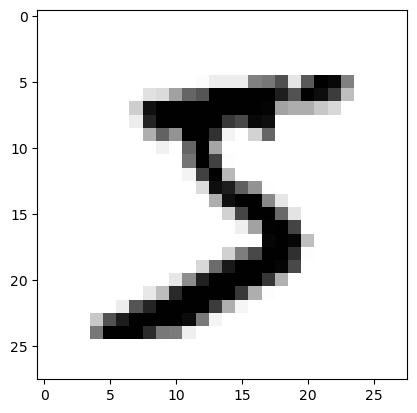

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

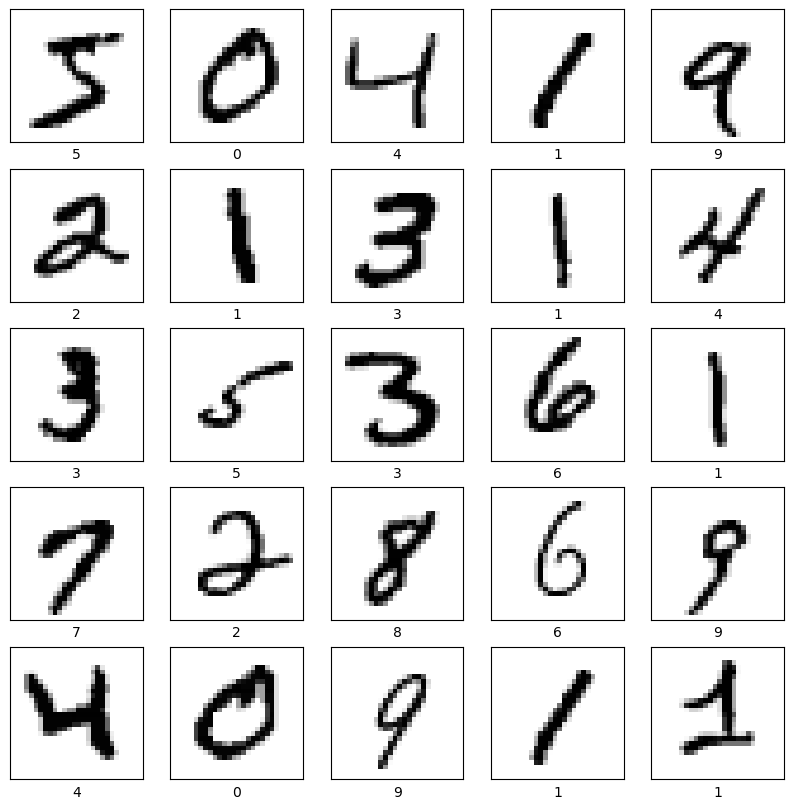

In [9]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Reshaping the data

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [10]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [11]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [12]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [13]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The las layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...


In [14]:



model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling(),
    name= 'conv1'
))


model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name= 'pool_1'
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling(),
    name= 'conv2'
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name= 'pool_2'
))
#model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:], name='flatten'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.relu,
    name = 'dense1'
));

model.add(tf.keras.layers.Dropout(0.2, name ='dropout1' ))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling() ,
    name = 'output'
))


######################################################################################################
# filters_per_conv_layer = [16, 16, 24]
# x = x_in = Input(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

# for i, f in enumerate(filters_per_conv_layer):
#     print(('Adding convolutional block {} with N={} filters').format(i, f))
#     x = Conv2D(
#         int(f),
#         kernel_size=(5),
#         strides=(1, 1),
#         kernel_initializer=tf.keras.initializers.VarianceScaling(),
#         name='conv_{}'.format(i),
#     )(x)
#     x = Activation('relu', name='conv_act_%i' % i)(x)
#     x = MaxPooling2D(pool_size=(2, 2),strides =(2,2) , name='pool_{}'.format(i))(x)
#     x = Conv2D(
#         int(f),
#         kernel_size=(3),
#         strides=(1, 1),
#         kernel_initializer=tf.keras.initializers.VarianceScaling(),
#         name='conv_{}'.format(i),
#     )(x)
        
        
#     x = BatchNormalization(name='bn_conv_{}'.format(i))(x)
#     x = Activation('relu', name='conv_act_%i' % i)(x)
#     x = MaxPooling2D(pool_size=(2, 2), name='pool_{}'.format(i))(x)
# x = Flatten()(x)

# for i, n in enumerate(neurons_per_dense_layer):
#     print(('Adding dense block {} with N={} neurons').format(i, n))
#     x = Dense(n, kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), name='dense_%i' % i, use_bias=False)(x)
#     x = BatchNormalization(name='bn_dense_{}'.format(i))(x)
#     x = Activation('relu', name='dense_act_%i' % i)(x)
# x = Dense(int(n_classes), name='output_dense')(x)
# x_out = Activation('softmax', name='output_softmax')(x)

# model = Model(inputs=[x_in], outputs=[x_out], name='keras_baseline')
 

2023-06-21 01:04:50.290032: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Here is our model summary so far.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 24, 24, 8)         208       
                                                                 
 pool_1 (MaxPooling2D)       (None, 12, 12, 8)         0         
                                                                 
 conv2 (Conv2D)              (None, 8, 8, 16)          3216      
                                                                 
 pool_2 (MaxPooling2D)       (None, 4, 4, 16)          0         
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense1 (Dense)              (None, 10)                2570      
                                                                 
 dropout1 (Dropout)          (None, 10)                0

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

In [16]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile the model

In [17]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [18]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7475 - accuracy: 0.7333 - val_loss: 0.1453 - val_accuracy: 0.9608
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3657 - accuracy: 0.8731 - val_loss: 0.1016 - val_accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3086 - accuracy: 0.8945 - val_loss: 0.0829 - val_accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.9123 - val_loss: 0.0700 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2225 - accuracy: 0.9289 - val_loss: 0.0646 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2038 - accuracy: 0.9351 - val_loss: 0.0639 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1922 - accuracy: 0.9372 - val_loss: 0.0651 - val_accuracy:

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

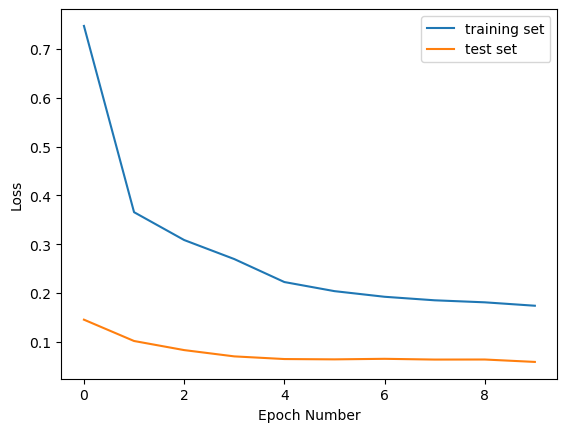

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

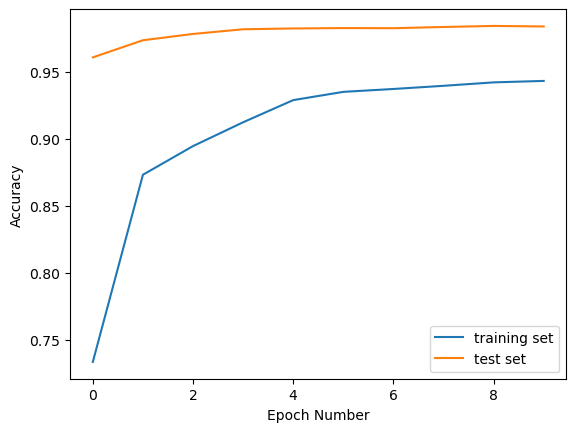

In [20]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [21]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [22]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.042629458010196686
Training accuracy:  0.9878833293914795


### Test set accuracy

In [23]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [24]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.058686986565589905
Validation accuracy:  0.9839000105857849


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model shuold be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [25]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [26]:
X_test_reduced = x_test[:3000]

In [27]:
import hls4ml

# config = hls4ml.utils.config_from_keras_model(model, granularity='model')
# print("-----------------------------------")
# print("Configuration")
# # plotting.print_dict(config)
# print("-----------------------------------")
# hls_model = hls4ml.converters.convert_from_keras_model(
#     model, hls_config=config, output_dir='model_1/hls4ml_prj', part='xczu7ev-ffvc1156-2-e'
# )


hls_config = hls4ml.utils.config_from_keras_model(model, granularity='name')
hls_config['Model']['ReuseFactor'] = 1
hls_config['LayerName']['conv1']['Strategy'] = 'Latency'
hls_config['LayerName']['conv2']['Strategy'] = 'Latency'

hls_config['LayerName']['pool_1']['Strategy'] = 'Latency'


hls_config['Model']['Precision'] = 'ap_fixed<16,6>'
hls_config['LayerName']['output']['Strategy'] = 'Stable'
#plotting.print_dict(hls_config_aq)

cfg = hls4ml.converters.create_config(backend='Vivado')
cfg['IOType'] = 'io_stream'  # Must set this if using CNNs!
cfg['HLSConfig'] = hls_config
cfg['KerasModel'] = model
cfg['OutputDir'] = 'normal_cnn/'
cfg['XilinxPart'] = 'zcu104'

hls_model = hls4ml.converters.keras_to_hls(cfg )
hls_model.compile()



Interpreting Sequential
Topology:
Layer name: conv1_input, layer type: InputLayer, input shapes: [[None, 28, 28, 1]], output shape: [None, 28, 28, 1]
Layer name: conv1, layer type: Conv2D, input shapes: [[None, 28, 28, 1]], output shape: [None, 24, 24, 8]
Layer name: pool_1, layer type: MaxPooling2D, input shapes: [[None, 24, 24, 8]], output shape: [None, 12, 12, 8]
Layer name: conv2, layer type: Conv2D, input shapes: [[None, 12, 12, 8]], output shape: [None, 8, 8, 16]
Layer name: pool_2, layer type: MaxPooling2D, input shapes: [[None, 8, 8, 16]], output shape: [None, 4, 4, 16]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 4, 4, 16]], output shape: [None, 256]
Layer name: dense1, layer type: Dense, input shapes: [[None, 256]], output shape: [None, 10]
Layer name: output, layer type: Dense, input shapes: [[None, 10]], output shape: [None, 10]
Interpreting Sequential
Topology:
Layer name: conv1_input, layer type: InputLayer, input shapes: [[None, 28, 28, 1]], output sha

In [28]:


X_test = np.ascontiguousarray(x_test_normalized)  
y_predict_hls4ml = hls_model.predict( X_test)



In [29]:
# print("-------------------------Start--------------------------")
# hls_model.compile()
# X_test = np.ascontiguousarray(x_test_normalized)
# y_hls = hls_model.predict(X_test)
# print("--------------------------End-------------------------")
# print("compilation done")

In [30]:
hls_model.build(csim=False, synth=True, vsynth=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /home/ayush/vivado_2019/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/home/ayush/vivado_2019/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'ayush' on host 'binodssd' (Linux_x86_64 version 5.19.0-45-generic) on Wed Jun 21 01:06:21 IST 2023
INFO: [HLS 200-10] On os Ubuntu 22.04.2 LTS
INFO: [HLS 200-10] In directory '/home/ayush/lasthls4ml/normal_cnn'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/ayush/lasthls4ml/normal_cnn/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] Adding test bench fil

INFO: [XFORM 203-602] Inlining function 'nnet::Op_max<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> >::operator()' into 'nnet::reduce<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2, nnet::Op_max<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> > >' (firmware/nnet_utils/nnet_common.h:43) automatically.
INFO: [XFORM 203-602] Inlining function 'nnet::reduce<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2, nnet::Op_max<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> > >' into 'nnet::reduce<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 4, nnet::Op_max<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> > >' (firmware/nnet_utils/nnet_common.h:45) automatically.
INFO: [XFORM 203-602] Inlining function 'nnet::Op_max<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> >::operator()' into 'nnet::reduce<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 4, nnet::Op_max<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> > >' (firmware/nnet_utils/nnet_common.h:45) automatically.
INFO: [XFORM 203-602] Inlining 

INFO: [HLS 200-489] Unrolling loop 'PoolLoop' (firmware/nnet_utils/nnet_pooling_stream.h:198) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, config4>' completely with a factor of 4.
INFO: [HLS 200-489] Unrolling loop 'UpdateBuffer' (firmware/nnet_utils/nnet_conv_stream.h:233) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 16u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 16u>, config7>' completely with a factor of 16.
INFO: [HLS 200-489] Unrolling loop 'LineBufferDataIn' (firmware/nnet_utils/nnet_conv_stream.h:241) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 16u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 16u>, config7>' completely with a factor of 16.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftWidth' (firmware/nnet_utils/nnet_conv_stream.h:194

INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_dense_latency.h:64) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 16u>, config5>' completely with a factor of 16.
INFO: [HLS 200-489] Unrolling loop 'CastLoop' (firmware/nnet_utils/nnet_conv_stream.h:303) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 16u>, config5>' completely with a factor of 16.
INFO: [HLS 200-489] Unrolling loop 'LineBufferShift' (firmware/nnet_utils/nnet_conv_stream.h:244) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, config2>' completely with a factor of 4.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftWidth' (firmware/nnet_utils/nnet_conv_stream.h:194) in function 'nn

INFO: [XFORM 203-101] Partitioning array 'shift_buffer.V' (firmware/nnet_utils/nnet_conv_stream.h:229) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'line_buffer.Array.V.2' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'tmp.data.V.6' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'pool_window.V' (firmware/nnet_utils/nnet_pooling_stream.h:178) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'kernel_data.V.2'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'shift_buffer.V' (firmware/nnet_utils/nnet_conv_stream.h:229) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'data.V' (firmware/nnet_utils/nnet_dense_stream.h:29) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'res'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'tmp.data.V' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'data.V' (firmware/nnet_uti

INFO: [XFORM 203-712] Applying dataflow to function 'myproject', detected/extracted 10 process function(s): 
	 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, config2>'
	 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, relu_config3>'
	 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, config4>'
	 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 16u>, config5>'
	 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 16u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 16u>, relu_config6>'
	 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 16u>, 

INFO: [HLS 200-111] Finished Architecture Synthesis Time (s): cpu = 00:08:03 ; elapsed = 00:08:07 . Memory (MB): peak = 9195.148 ; gain = 8780.051 ; free physical = 3753 ; free virtual = 107441
INFO: [HLS 200-10] Starting hardware synthesis ...
INFO: [HLS 200-10] Synthesizing 'myproject' ...
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'conv_2d_cl_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_8u_config2_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReadInputHeight_ReadInputWidth'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 4.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 487.5 seconds; current allocated memory: 667.714 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing var

INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.58 seconds; current allocated memory: 859.138 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config9_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 5.68 seconds; current allocated memory: 902.266 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] B

INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Starting global binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.56 seconds; current allocated memory: 969.073 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'softmax_array_array_ap_fixed_16_6_5_3_0_10u_softmax_config12_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.62 seconds; current allocated memory: 969.412 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Ex

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------


INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s_line_buffer_Array_V_1_0_0' to 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s_line_bufncg' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s_line_buffer_Array_V_1_1_0' to 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s_line_bufocq' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s_line_buffer_Array_V_1_2_0' to 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s_line_bufpcA' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s_line_buffer_Array_V_1_3_0' to 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s_line_bufqcK' due to the length limit 80


INFO: [RTGEN 206-104] Estimated max fanout for 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s' is 45168 from HDL expression: ((1'b0 == ap_block_pp0_stage0) & (ap_enable_reg_pp0_iter2 == 1'b1))
INFO: [RTGEN 206-100] Finished creating RTL model for 'conv_2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_16u_config5_s'.
INFO: [HLS 200-111]  Elapsed time: 4.09 seconds; current allocated memory: 1.102 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_ap_fixed_16u_array_ap_fixed_16_6_5_3_0_16u_relu_config6_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_ap_fixed_16u_array_ap_fixed_16_6_5_3_0_16u_relu_config6_s'.
INFO: [HLS 200-111]  Elapsed time: 47.43 seconds; current allocated memory: 1.388 GB.
INFO: [HLS 200-10] ------------------------------------------------------

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config9_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-104] Estimated max fanout for 'dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config9_s' is 115571 from HDL expression: (1'b1 == ap_CS_fsm_state2)
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_10ns_26_1_1': 197 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_10s_26_1_1': 197 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_11ns_26_1_1': 18 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_11s_26_1_1': 16 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_6ns_22_1_1': 50 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_m

INFO: [RTMG 210-279] Implementing memory 'softmax_stable_array_array_ap_fixed_16_6_5_3_0_10u_softmax_config12_s_exp_tab9j0_rom' using block ROMs.
INFO: [RTMG 210-279] Implementing memory 'softmax_stable_array_array_ap_fixed_16_6_5_3_0_10u_softmax_config12_s_invert_bak_rom' using auto ROMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_0_V_U(fifo_w16_d576_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_1_V_U(fifo_w16_d576_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_2_V_U(fifo_w16_d576_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_3_V_U(fifo_w16_d576_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_4_V_U(fifo_w16_d576_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_5_V_U(fifo_w16_d576_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_6_V_U(fifo_w16_d576_A)' using Block RAMs.
INFO: [RT

INFO: [HLS 200-111] Finished generating all RTL models Time (s): cpu = 00:13:51 ; elapsed = 00:14:15 . Memory (MB): peak = 9195.148 ; gain = 8780.051 ; free physical = 603 ; free virtual = 105502
INFO: [VHDL 208-304] Generating VHDL RTL for myproject.
INFO: [VLOG 209-307] Generating Verilog RTL for myproject.
***** C/RTL SYNTHESIS COMPLETED IN 0h14m13s *****
***** VIVADO SYNTHESIS *****

****** Vivado v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source vivado_synth.tcl
# set tcldir [file dirname [info script]]
# source [file join $tcldir project.tcl]
## variable project_name
## set project_name "myproject"
## variable backend
## set backend "vivado"
## variable part
## set part "xcku115-flvb2104-2-i"
## variable clock_period
## set clock_period 5
## variable clock_uncertainty
## set clock_uncertainty 12.5%
# add_files ${project_name}_prj/solu

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.295',
  'BestLatency': '807',
  'WorstLatency': '807',
  'IntervalMin': '789',
  'IntervalMax': '789',
  'BRAM_18K': '59',
  'DSP': '4727',
  'FF': '131881',
  'LUT': '177805',
  'URAM': '0',
  'AvailableBRAM_18K': '4320',
  'AvailableDSP': '5520',
  'AvailableFF': '1326720',
  'AvailableLUT': '663360',
  'AvailableURAM': '0'}}

In [ ]:
hls4ml.report.read_vivado_report( 'model_1/hls4ml_prj')

In [ ]:
def getReports(indir):
    data_ = {}

    report_vsynth = Path('{}/vivado_synth.rpt'.format(indir))
    report_csynth = Path('{}/myproject_prj/solution1/syn/report/myproject_csynth.rpt'.format(indir))

    if report_vsynth.is_file() and report_csynth.is_file():
        print('Found valid vsynth and synth in {}! Fetching numbers'.format(indir))

        # Get the resources from the logic synthesis report
        with report_vsynth.open() as report:
            lines = np.array(report.readlines())
            data_['lut'] = int(lines[np.array(['CLB LUTs*' in line for line in lines])][0].split('|')[2])
            data_['ff'] = int(lines[np.array(['CLB Registers' in line for line in lines])][0].split('|')[2])
            data_['bram'] = float(lines[np.array(['Block RAM Tile' in line for line in lines])][0].split('|')[2])
            data_['dsp'] = int(lines[np.array(['DSPs' in line for line in lines])][0].split('|')[2])
            data_['lut_rel'] = float(lines[np.array(['CLB LUTs*' in line for line in lines])][0].split('|')[5])
            data_['ff_rel'] = float(lines[np.array(['CLB Registers' in line for line in lines])][0].split('|')[5])
            data_['bram_rel'] = float(lines[np.array(['Block RAM Tile' in line for line in lines])][0].split('|')[5])
            data_['dsp_rel'] = float(lines[np.array(['DSPs' in line for line in lines])][0].split('|')[5])

        with report_csynth.open() as report:
            lines = np.array(report.readlines())
            lat_line = lines[np.argwhere(np.array(['Latency (cycles)' in line for line in lines])).flatten()[0] + 3]
            data_['latency_clks'] = int(lat_line.split('|')[2])
            data_['latency_mus'] = float(lat_line.split('|')[2]) * 5.0 / 1000.0
            data_['latency_ii'] = int(lat_line.split('|')[6])

    return data_

In [ ]:
from pathlib import Path
import pprint

data_pruned_ref = getReports('pruned_cnn')
data_quantized_pruned = getReports('quantized_pruned_cnn')

print("\n Resource usage and latency: Pruned")
pprint.pprint(data_pruned_ref)
print("\n Resource usage and latency: Pruned + quantized")
pprint.pprint(data_quantized_pruned)


In [ ]:
#////////////////////////////////////////////////////////////////End

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

So our model is predicting that the first example from the test set is `7`.

In [ ]:
print(predictions[0])

Let's print the first image from a test set to see if model's prediction is correct.

In [ ]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Debugging the model with TensorBoard

[TensorBoard](https://www.tensorflow.org/tensorboard) is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

In [ ]:
%tensorboard --logdir .logs/fit

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/digits_recognition_cnn/digits_recognition_cnn.h5 \
  ./demos/public/models/digits_recognition_cnn
```

You find this experiment in the [Demo app](https://trekhleb.github.io/machine-learning-experiments) and play around with it right in you browser to see how the model performs in real life.